# A Quick Guide on CVXPY

**Step 1:** Install CVX (http://cvxr.com/cvx  (Links to an external site.)) You can choose to use
any programming platform (Matlab, Julia, Python, R, C etc). Information on cvxpy can be found here (https://www.cvxpy.org/index.html#)

**Step 2:** Read the user manual to get an idea of how to setup and solve optimization problems.  

**Step 3:** Try the following examnple on solving least square problem. Make sure that you can solve it and get correct answer.

## Install
### Pip
(Windows only) Download the Visual Studio build tools for Python 3 (instructions).

(macOS only) Install the Xcode command line tools.

(optional) Create and activate a virtual environment.

Install CVXPY using pip:

> ! pip install cvxpy

### Conda
conda is a system for package and environment management.

(Windows only) Download the Visual Studio build tools for Python 3.

Install conda.

Create a new conda environment,

> conda create --name cvxpy_env

> conda activate cvxpy_env


Install cvxpy from conda-forge

> conda install -c conda-forge cvxpy

## Example

In the following code, we solve a least-squares problem with CVXPY.

$\underset{x}{\operatorname{minimize}} \quad\|A x-b\|_2^2$

$A \in \mathcal{R}^{m \times n}$ and $b \in \mathcal{R}^m$ are problem data and $x \in \mathcal{R}^n$ is the optimization variable.

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
# Generate data.
m = 20
n = 15
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)
print("A is:", A)
print("-"*50)
print("b is:", b)
# Define and solve the CVXPY problem.
x = cp.Variable(n)
cost = cp.sum_squares(A@x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()
# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is", x.value)
print("The norm of the residual is ", cp.norm(A@x - b, p=2).value)

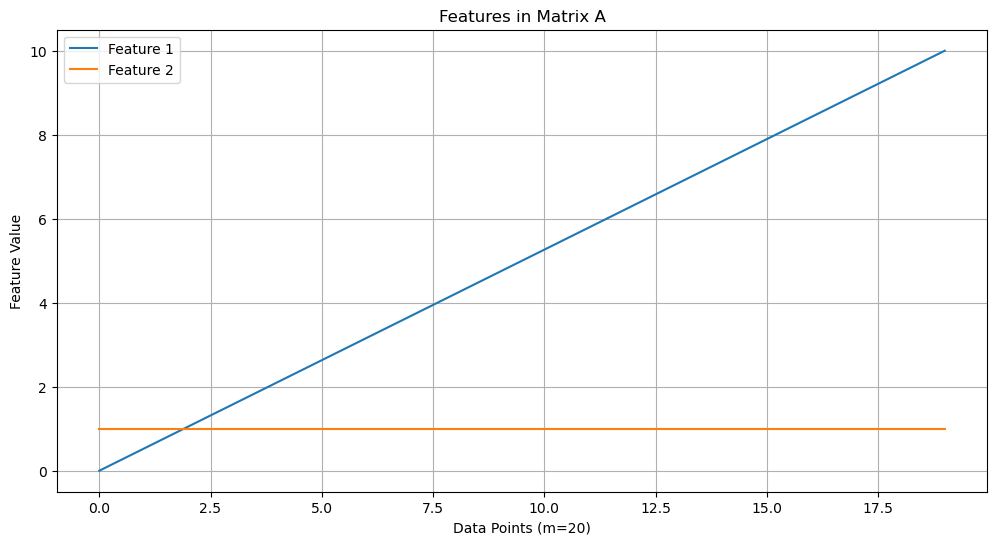

In [26]:
# 可视化每列特征的分布
plt.figure(figsize=(12, 6))
for i in range(A.shape[1]):
    plt.plot(A[:, i], label=f'Feature {i+1}')
plt.title("Features in Matrix A")
plt.xlabel("Data Points (m=20)")
plt.ylabel("Feature Value")
plt.legend()
plt.grid()
plt.show()

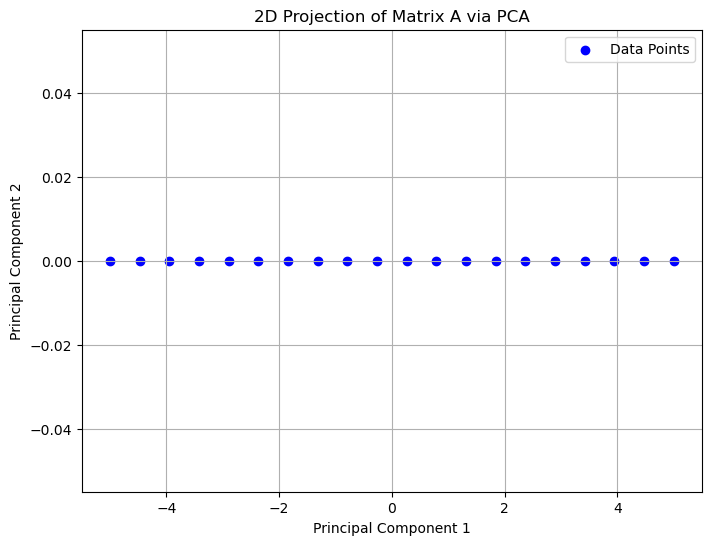

In [27]:
from sklearn.decomposition import PCA

# 用 PCA 将矩阵 A 降到二维
pca = PCA(n_components=2)
A_reduced = pca.fit_transform(A)

# 可视化降维后的矩阵
plt.figure(figsize=(8, 6))
plt.scatter(A_reduced[:, 0], A_reduced[:, 1], c='blue', label='Data Points')
plt.title("2D Projection of Matrix A via PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

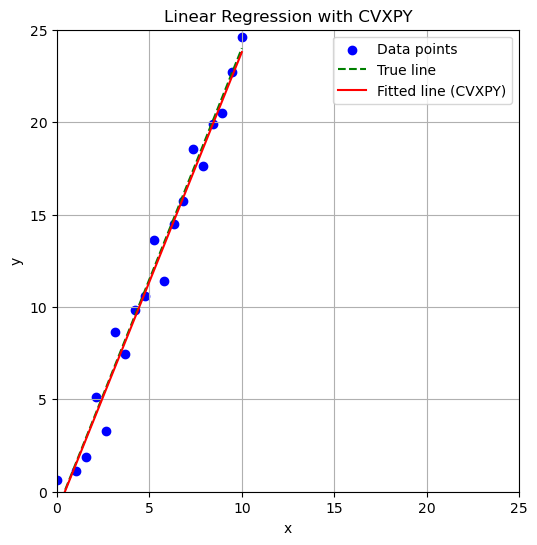

Optimal slope: 2.4842220788860123
Optimal intercept: -1.0544750308907906


In [ ]:

# 生成数据点
np.random.seed(1)
n_points = 20
x_data = np.linspace(0, 10, n_points)
true_slope = 2.5  # 真正的斜率
true_intercept = -1.0  # 真正的截距
noise = np.random.randn(n_points)  # 添加随机噪声
y_data = true_slope * x_data + true_intercept + noise

# 定义 A 和 b
A = np.vstack([x_data, np.ones(n_points)]).T  # 设计矩阵
b = y_data  # 输出值

# 用 CVXPY 定义优化问题
x = cp.Variable(2)  # 包括 [slope, intercept]
cost = cp.sum_squares(A @ x - b)  # 最小二乘损失函数
problem = cp.Problem(cp.Minimize(cost))
problem.solve()

# 提取结果
optimal_slope, optimal_intercept = x.value

# 可视化
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_data, y_data, label="Data points", color="blue")
ax.plot(
    x_data,
    true_slope * x_data + true_intercept,
    label="True line",
    linestyle="--",
    color="green",
)
ax.plot(
    x_data,
    optimal_slope * x_data + optimal_intercept,
    label="Fitted line (CVXPY)",
    color="red",
)

# 设置 x 和 y 轴从 0 开始
ax.set_xlim(0, 25)  # x轴范围从 0 到 10
ax.set_ylim(0, 25)  # y轴范围从 0 到 25

# 保持等比例
ax.set_aspect(aspect='equal')  # 让比例自动适配

ax.set_title("Linear Regression with CVXPY")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()
plt.show()

# 输出结果
print(f"Optimal slope: {optimal_slope}")
print(f"Optimal intercept: {optimal_intercept}")

In [ ]:
# 可视化矩阵 A 的值
plt.figure(figsize=(8, 6))
plt.imshow(A, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.title("Heatmap of Matrix A")
plt.xlabel("Features (n=15)")
plt.ylabel("Data Points (m=20)")
plt.show()

# 可视化理解

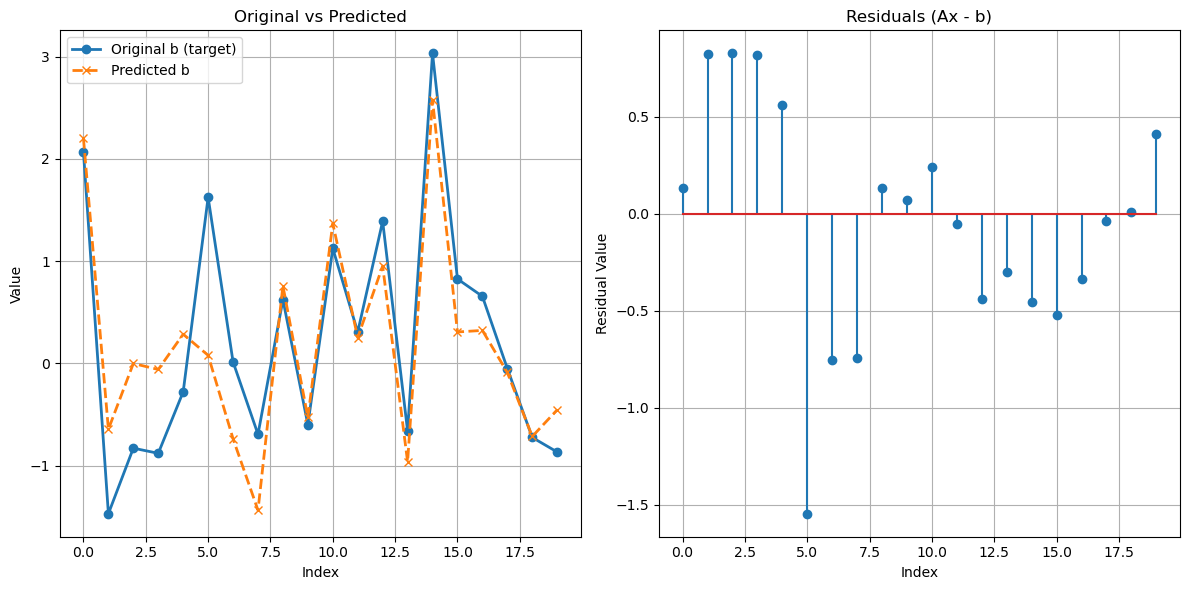


The optimal value is 7.005909828287486
The optimal x is [ 0.17492418 -0.38102551  0.34732251  0.0173098  -0.0845784  -0.08134019
  0.293119    0.27019762  0.17493179 -0.23953449  0.64097935 -0.41633637
  0.12799688  0.1063942  -0.32158411]
The norm of the residual is  2.646867928002356


In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Generate data
m = 20
n = 15
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Define and solve the CVXPY problem
x = cp.Variable(n)
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Predictions
predicted_b = A @ x.value
residual = predicted_b - b

# Visualization
plt.figure(figsize=(12, 6))

# Plot original vs predicted
plt.subplot(1, 2, 1)
plt.plot(b, 'o-', label='Original b (target)', linewidth=2)
plt.plot(predicted_b, 'x--', label='Predicted b', linewidth=2)
plt.title('Original vs Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Plot residuals
plt.subplot(1, 2, 2)
plt.stem(residual)
plt.title('Residuals (Ax - b)')
plt.xlabel('Index')
plt.ylabel('Residual Value')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print additional metrics
print("\nThe optimal value is", prob.value)
print("The optimal x is", x.value)
print("The norm of the residual is ", cp.norm(A @ x - b, p=2).value)

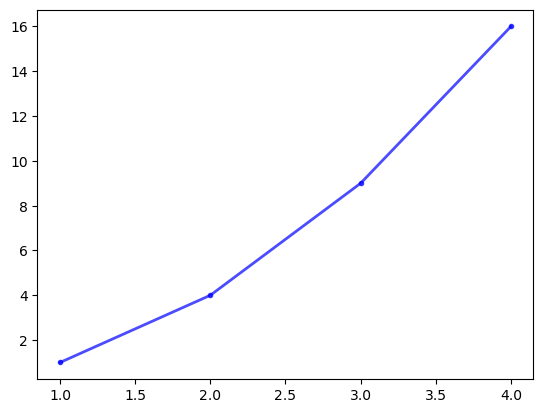

In [36]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'b.-', linewidth=2, alpha=0.7)